Mal die Daten für die 6 aktivsten Nutzer holen...

In [1]:
from src.data.dataset_functions import get_dataframe

dataFrame = get_dataframe(True) # sample data only

providing ../data/raw/2022_place_canvas_history-000000000050.csv ...
../data/raw/2022_place_canvas_history-000000000050.csv is already in data/raw
:: loading settings :: url = jar:file:/usr/local/lib/python3.9/site-packages/pyspark/jars/ivy-2.5.0.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/vscode/.ivy2/cache
The jars for the packages stored in: /home/vscode/.ivy2/jars
graphframes#graphframes added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-f503e71f-b96d-4097-afa0-d3eb25e6413f;1.0
	confs: [default]
	found graphframes#graphframes;0.8.2-spark3.2-s_2.12 in spark-packages
	found org.slf4j#slf4j-api;1.7.16 in central
:: resolution report :: resolve 348ms :: artifacts dl 29ms
	:: modules in use:
	graphframes#graphframes;0.8.2-spark3.2-s_2.12 from spark-packages in [default]
	org.slf4j#slf4j-api;1.7.16 from central in [default]
	---------------------------------------------------------------------
	|                  |            modules            ||   artifacts   |
	|       conf       | number| search|dwnlded|evicted|| number|dwnlded|
	---------------------------------------------------------------------
	|      default     |   2   |   0   |   0   |   0   ||   2   |   0   |
	--------------------------------

In [2]:
dataFrame.printSchema()
dataFrame.show(1)

root
 |-- user_id: string (nullable = true)
 |-- x: integer (nullable = true)
 |-- y: integer (nullable = true)
 |-- t: long (nullable = true)
 |-- pixel_color: string (nullable = true)

+--------------------+---+----+---+-----------+
|             user_id|  x|   y|  t|pixel_color|
+--------------------+---+----+---+-----------+
|vKtmwRQwAYtw5poO4...|804|1992|  0|    #FF3881|
+--------------------+---+----+---+-----------+
only showing top 1 row



In [3]:
from src.features.feature_functions import group_dataframe_by_user
groupedFrame = group_dataframe_by_user(dataFrame)
groupedFrame.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- count: long (nullable = false)
 |-- collect_list(x): array (nullable = false)
 |    |-- element: integer (containsNull = false)
 |-- collect_list(y): array (nullable = false)
 |    |-- element: integer (containsNull = false)
 |-- collect_list(t): array (nullable = false)
 |    |-- element: long (containsNull = false)
 |-- collect_list(pixel_color): array (nullable = false)
 |    |-- element: string (containsNull = false)



In [4]:
dataCollection = groupedFrame.take(5)

In [5]:
print(dataCollection)

[Row(user_id='AxBTmhBMbr1sbDw/2liFySQ4h6lH1bZSyjS9RtcBxvMyafVj+e2grv9teqbU9JkFDCPlgIfWH+L2CzKeSBdB4w==', count=20, collect_list(x)=[1617, 1447, 655, 1636, 612, 1287, 1575, 1926, 1310, 1611, 658, 584, 1403, 1765, 777, 1741, 1299, 586, 788, 656], collect_list(y)=[16, 5, 1896, 21, 1917, 8, 7, 19, 10, 33, 14, 26, 2, 8, 8, 10, 20, 1931, 11, 1884], collect_list(t)=[1417, 184, 1726, 492, 1726, 801, 1726, 801, 1109, 3269, 2035, 3577, 2344, 3577, 2344, 2344, 2653, 2653, 2961, 2961], collect_list(pixel_color)=['#FF4500', '#FFA800', '#B44AC0', '#FFFFFF', '#E4ABFF', '#3690EA', '#FFA800', '#BE0039', '#2450A4', '#2450A4', '#FF4500', '#000000', '#FFA800', '#FFA800', '#FFA800', '#FFA800', '#FFFFFF', '#9C6926', '#000000', '#E4ABFF']), Row(user_id='DIECtVqoJqBlL6A0CMGRw6TfCIlTowT+hQoDyEz3S91RmjngeAKnaUmssE670zOhwyktblGM5JkKDyXk45Rdpg==', count=15, collect_list(x)=[936, 924, 935, 917, 909, 916, 932, 920, 933, 930, 920, 958, 1650, 903, 919], collect_list(y)=[1861, 1860, 1863, 1836, 1856, 1851, 1757, 1832,

[[[1617, 1447, 655, 1636, 612, 1287, 1575, 1926, 1310, 1611, 658, 584, 1403, 1765, 777, 1741, 1299, 586, 788, 656], [16, 5, 1896, 21, 1917, 8, 7, 19, 10, 33, 14, 26, 2, 8, 8, 10, 20, 1931, 11, 1884], [1417, 184, 1726, 492, 1726, 801, 1726, 801, 1109, 3269, 2035, 3577, 2344, 3577, 2344, 2344, 2653, 2653, 2961, 2961]], [[936, 924, 935, 917, 909, 916, 932, 920, 933, 930, 920, 958, 1650, 903, 919], [1861, 1860, 1863, 1836, 1856, 1851, 1757, 1832, 1838, 1847, 1852, 1831, 227, 1850, 1872], [293, 1502, 595, 595, 897, 897, 1200, 1200, 1200, 3314, 1804, 2106, 2408, 2710, 3012]], [[998, 998, 998, 998, 998, 998, 998, 998, 998, 998, 998, 998, 998, 998, 998], [1466, 1466, 1466, 1466, 1466, 1466, 1466, 1466, 1466, 1466, 1466, 1466, 1466, 1466, 1466], [1500, 60, 1500, 420, 420, 780, 1140, 3300, 1860, 3300, 1860, 2220, 2220, 2580, 2940]], [[1654, 982, 913, 947, 906, 931, 957, 1631, 936, 935, 933, 907, 1620, 1636, 929], [249, 1851, 1871, 1868, 1865, 1846, 1833, 220, 1833, 1847, 1853, 1860, 256, 213, 18

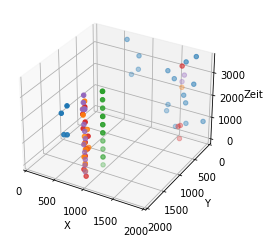

<Axes3DSubplot:xlabel='X', ylabel='Y'>

In [6]:
from src.visualization.visuialization_functions import plot_list_of_pixellist

userpixel = []
for row in dataCollection:
    user_id , count ,xs , ys , ts , pixel_color = list(row)
    userpixel.append([xs,ys,ts])
print(userpixel)
plot_list_of_pixellist(userpixel)


[[1617, 1447, 655, 1636, 612, 1287, 1575, 1926, 1310, 1611, 658, 584, 1403, 1765, 777, 1741, 1299, 586, 788, 656], [16, 5, 1896, 21, 1917, 8, 7, 19, 10, 33, 14, 26, 2, 8, 8, 10, 20, 1931, 11, 1884], [1417, 184, 1726, 492, 1726, 801, 1726, 801, 1109, 3269, 2035, 3577, 2344, 3577, 2344, 2344, 2653, 2653, 2961, 2961]]


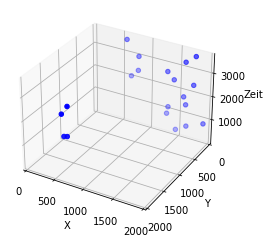

<Axes3DSubplot:xlabel='X', ylabel='Y'>

In [7]:
from src.visualization.visuialization_functions import plot_pixellist

print(userpixel[0])
plot_pixellist(userpixel[0])

# Frage: Was kann man mit nach Nutzer gruppierten Pixeldaten noch so machen?

### Wie viele Pixel hat der Nutzer gesetzt? -> Nach gesetzter Pixelanzahl gruppieren -> Wie viele Nutzer haben X Pixel gesetzt?

In [8]:
from src.features.feature_functions import group_dataframe_by_columns
# Vom Nutzergruppierten Frame können wir erstmal alle Pixeldaten droppen, die brauchen wir nicht zum weiter rechen. Nur die Anzahl pro Nutzer.
# group_dataframe_by_columns hängt automatisch eine neue 'count' Spale an. Die neue wird die Nutzer pro Pixelhäufigkeit zählen. Die alte hat die Pixel pro Nutzer gezählt
# 2x 'count' als Spaltenname muss also umbenannt werden
droppedFrame = groupedFrame.drop('collect_list(x)').drop('collect_list(y)').drop('collect_list(t)').drop('collect_list(pixel_color)').withColumnRenamed('count','pixelcount').drop('user_id')

groupedbypixelcountFrame = group_dataframe_by_columns(droppedFrame,['pixelcount'])

groupedbypixelcountFrame.printSchema()




root
 |-- pixelcount: long (nullable = false)
 |-- count: long (nullable = false)



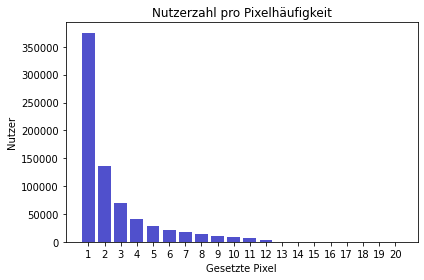

In [16]:
from src.visualization.visuialization_functions import show_and_save,new_xyt_plot
datacollect = groupedbypixelcountFrame.collect()
import matplotlib.pyplot as plt
import numpy as np
fig,ax = plt.subplots()
for row in datacollect:
    pixelcount,usercount = list(row)
    ax.bar(pixelcount,usercount,color='#5050cc')
ax.set_xticks(np.arange(1,21,1))
ax.set_title('Nutzerzahl pro Pixelhäufigkeit')
ax.set_ylabel('Nutzer')
ax.set_xlabel('Gesetzte Pixel')
fig.tight_layout()
plt.savefig('../reports/figures/nutzerzahl_pro_pixelhaeufigkeit.jpg',bbox_inches = 'tight')
plt.show()